<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/HOML_10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Image Classifier using Sequentials API

Taken from *Hands-on Machine Learning with Scikit-Learn and Tensorflow* Chap 10 page 294

The dataset Fashion MNIST are 70,000 grayscale images of 28 x 28 pixels with 10 classes 

In [2]:
import tensorflow as tf
from tensorflow import keras

# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one
important difference is that every image is represented as a 28×28 array rather than a
1D array of size 784. Moreover, the pixel intensities are represented as grayscale images, i.e. integers (from
0 to 255) rather than floats (from 0.0 to 255.0). 60,000 images will be used for training, while 10,000 as test

In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

We are going to take first 5,000 of the training datasets as validation sets and map the pixel intensities to 0 - 1 range, by dividing them with 255. 

In [17]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

Let's look at 10 first image of the training data, starting by initiating class name of the fashion products

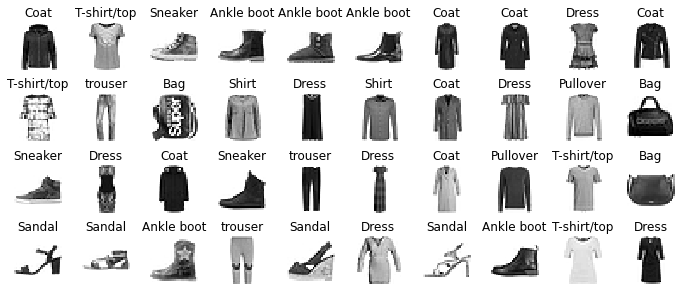

In [23]:
class_names = ["T-shirt/top", "trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Creating Model with Sequentials API